In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt 

### 1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [5]:
df_class = iris.target   #variety

In [6]:
df = df[['sepal length (cm)', 'sepal width (cm)']]
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### 3. Разделите данные на выборку для обучения и тестирования

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, df_class, test_size=0.3)

### 4. Постройте модель LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [9]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
y_pred = lda.predict(x_test)

In [11]:
result = pd.DataFrame({'test': y_test, 'predict': y_pred})
result.head()

,test,predict
0,0,0
1,0,0
2,2,1
3,2,2
4,2,2


In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, y_pred)

0.9111111111111111

## 5. Визуализируйте предсказания для тестовой выборки и центры классов

In [14]:
lda.means_

array([[4.95483871, 3.35483871],
       [5.94722222, 2.75833333],
       [6.47631579, 2.96578947]])

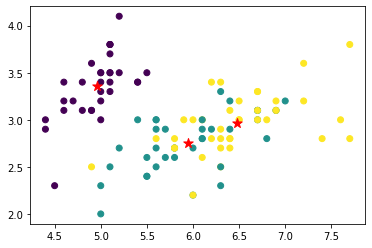

In [15]:
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=100, marker='*')
plt.show()

### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [16]:
from sklearn.cluster import KMeans

In [24]:
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

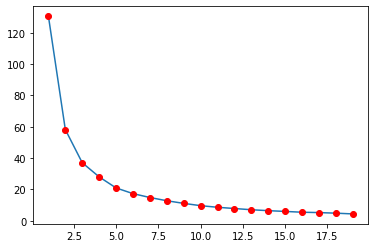

In [25]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [38]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

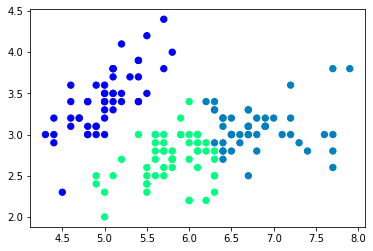

In [42]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], cmap='winter', c=clusters, s=40)